# Обучение без учителя
- В задачах машинного обучения без учителя нет целевой переменной (правильных ответов), есть только признаковое описание объектов. Необходимо выявить некоторые скрытые закономерности данных, понять, как объекты устроены, есть ли в данных какая-то структура.
- **Кластеризация**: k-means, DBSCAN, ...
- **Визуализация**: PCA, t-SNE, ...
- Задача кластеризации состоит в том, чтобы разбить объекты, которые даны в выборке, на несколько кластеров, так чтобы объекты в одном кластере были похожи друг на друга, а объекты в разных кластерах были не похожи друг на друга.

# 1. k-means
Кластеры представляют собой центроиды, то есть каждый кластер задаётся координатами центра, а точки относятся к тому кластеру, чей центр к ним ближе. 
<img src='images/kmeans.png'>

Минимизируем полную сумму квадратов расстояний от каждой точки до среднего значения назначенного ей кластера
Итерационный алгоритм:
1. берём k случайных центров (*k средних*)
2. присоединяем все объекты к ближайшему к ним кластеру
3. пересчитываем координаты кластеров, чтобы они оказались в центре масс точек, которые относятся к ним. То есть для каждой центроиды берём все точки, которые к ней относятся, считаем среднее.
4. снова ищем для каждой точки ближайший центроид
- Если ни у одной точки её назначение не изменилось, то останавливаемся и сохраняем кластеры.
### Достоинства:
+ Очень простой алгоритм
+ Работает даже на больших данных
### Недостатки:
- Надо задавать число k руками
- Не всегда находит кластеры правильно (ищет только кластеры выпуклой формы)
- сильно зависит от начальной инициализации центров кластеров (разный результат от запуска к запуску)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(42)

In [3]:
X1 = np.random.normal(loc=[0,-10], size=(100,2))
X2 = np.random.normal(loc=[-10, 0], size=(100,2))
X3 = np.random.normal(loc=[0, 0], size=(100,2))
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

In [4]:
k_means = KMeans(n_clusters=3)

In [5]:
clusters = k_means.fit_predict(X)

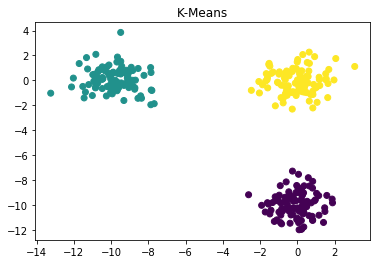

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('K-Means')
plt.show()

Попробуем разное количество кластеров:

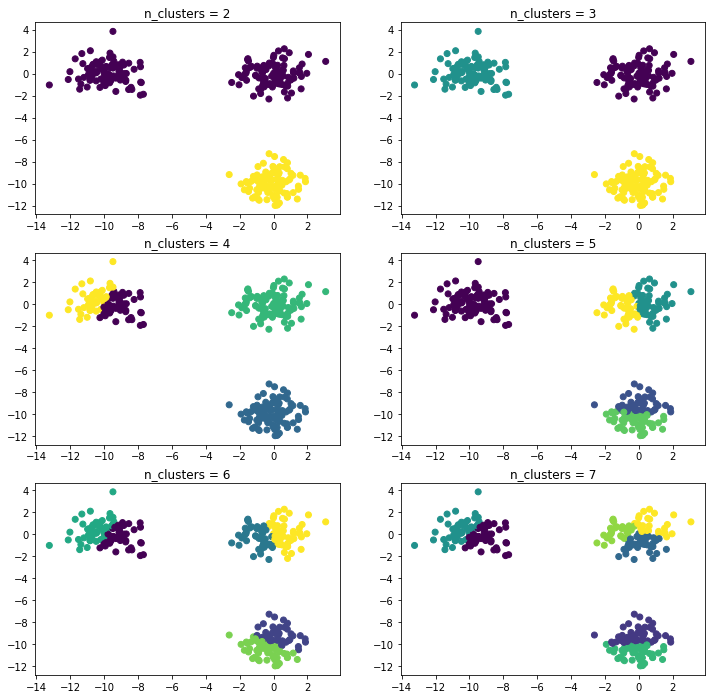

In [10]:
plt.figure(figsize=(12, 12))
for n_c in range(2, 8):
    k_means = KMeans(n_clusters=n_c)
    clusters = k_means.fit_predict(X)
    plt.subplot(3, 2, n_c-1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters)
    plt.title('n_clusters = {}'.format(n_c))
plt.show()

# 2. DBSCAN
Идея: хотим найти скопления точек, не зная заранее количество кластеров

Нужно задать два параметра:
- размер окрестности точки $\epsilon$
- minPts - минимальное количество точек в $\epsilon$ - окрестности

Тогда все точки можно разделить на три типа:
- Core (ядровые) точки - у которых в $\epsilon$ - окрестности от minPts соседей
- Border (граничные) точки - не Core точки, но достижимы из Core точек
- Noise (шумовые) точки - все остальные, меньше minPts соседей в $\epsilon$ - окрестности

<img src = 'images/DBSCAN.png'>
- minPts = 4
- вокруг каждой точки есть своя $\epsilon$ - окрестность
- точка А и все красные точки - core (ядровые), так как $\epsilon$ окрестность вокруг них содержит по 4 и более точек (включая себя).
- точки B и С -border points, они не core points (ядровые), но они достижимы из A через другие ядровые точки, поэтому они тоже принадлежат кластеру
- точка N - шум

### Алгоритм:
1. берём следующую точку, ищем соседей в $\epsilon$ окрестности
2. если их как минимум minPts, то начинаем поиск связной компоненты из этой core-точки (обход в ширину)
3. иначе помечаем точку как noise, она может быть позднее к какой-то Core-точке как Border-точка

РИСУНКИ пошагово

### Достоинства:
+ Не нужно задавать количество кластеров
+ Кластеры могут быть любой формы
+ Может работать с шумными данными
### Недостатки:
- Долго работает на больших данных
- Чувствителен к выбору гиперпараметров (лучше использовать иерархический HDBSCAN)

In [9]:
from sklearn.cluster import DBSCAN

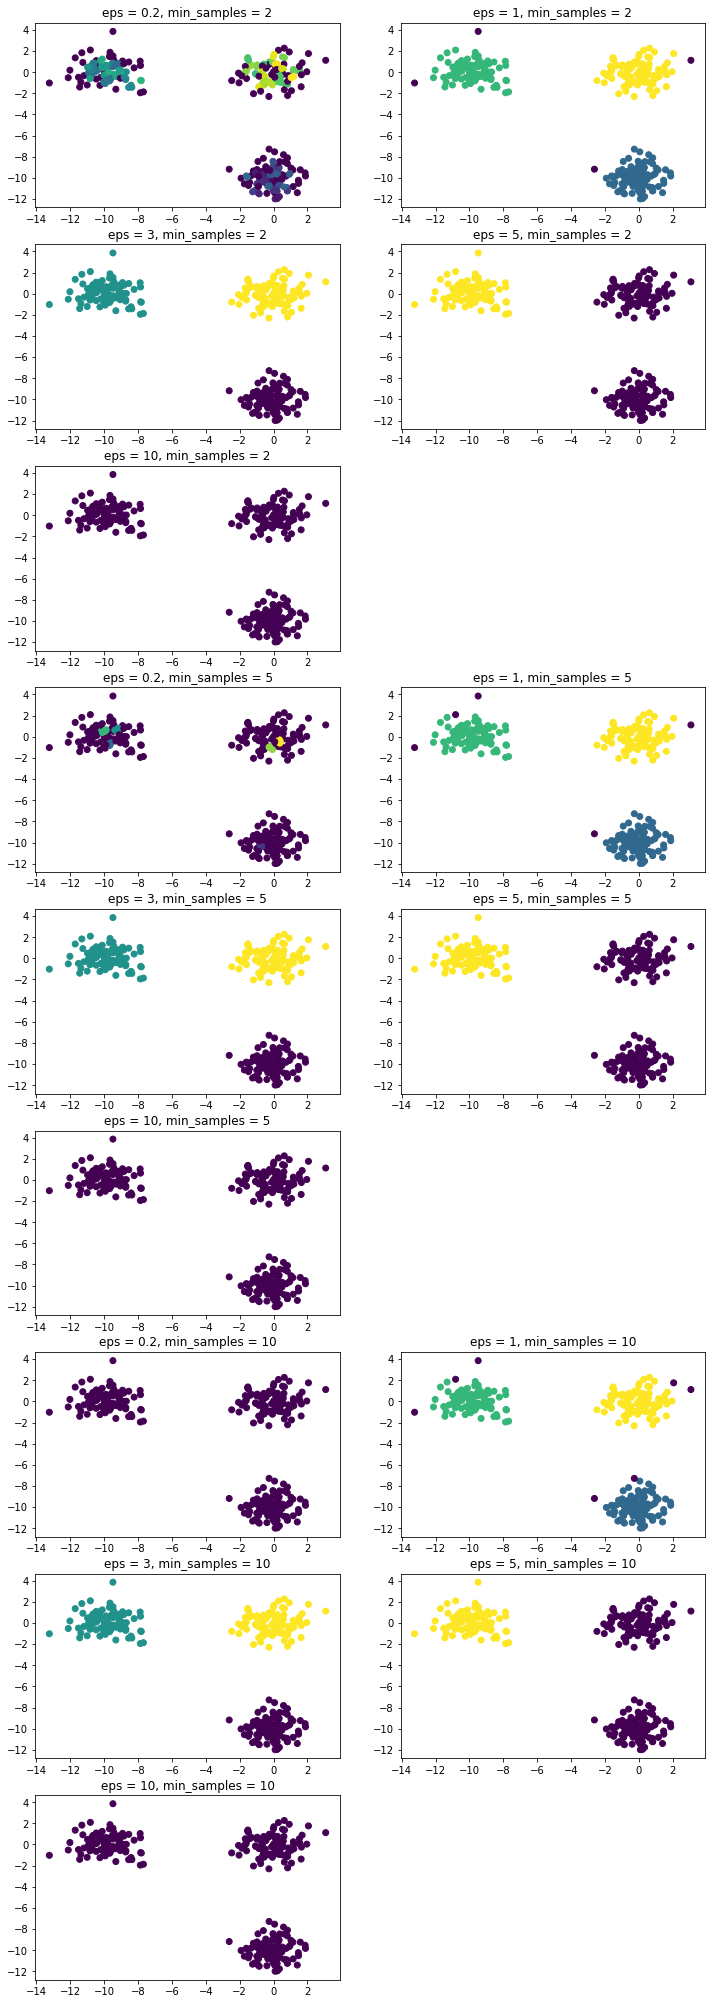

In [10]:
from sklearn.cluster import DBSCAN
plt.figure(figsize=(12, 36))
i = 1
for sample in [2, 5, 10]:
    for e in [0.2, 1, 3, 5, 10]:
        dbscan = DBSCAN(eps=e, min_samples=sample)
        clusters = dbscan.fit_predict(X)
        plt.subplot(9, 2, i)
        plt.scatter(X[:, 0], X[:, 1], c=clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, sample))
        i += 1
    i += 1
plt.show()

In [11]:
n_samples = 1500
X = datasets.make_circles(n_samples=n_samples, 
                          factor = 0.5, 
                          noise = 0.05)
X = X[0]
X.shape

(1500, 2)

In [12]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

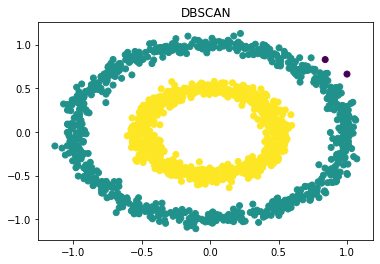

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.title('DBSCAN');


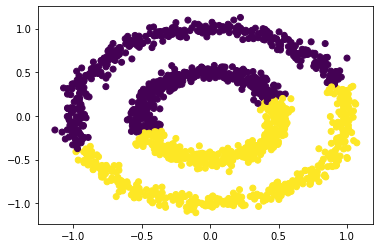

In [14]:
k_means = KMeans(n_clusters=2)
clusters = k_means.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = clusters);

# 3. PCA Метод главных компонент